<a href="https://colab.research.google.com/github/poorya99/opencv/blob/main/Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

def plot_history(net_history):
  losses = history['loss']
  accuracies = history['accuracy']
  val_losses = history['val_loss']
  val_accuracy = history['val_accuracy']
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(losses)
  plt.plot(val_losses)
  plt.legend(['loss', 'val_loss'])

  plt.figure()

  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(accuracies)
  plt.plot(val_accuracy)
  plt.legend(['acc', 'val_acc'])


  


In [11]:

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)


X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /= 255
X_test /= 255


from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)



# ======================================


from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Flatten, Dense
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
import keras

myInput = Input(shape=(28, 28, 1))
conv1 = Conv2D(16, 3, activation='relu', padding='same', strides =2)(myInput)
# pool1 = MaxPool2D(pool_size=2)(conv1)
conv2 = Conv2D(32, 3, activation='relu', padding='same', strides =2)(conv1)
# pool2 = MaxPool2D(pool_size=2)(conv2)
flat = Flatten()(conv2)
out_layer = Dense(10, activation='softmax')(flat  )

myModel = Model(myInput, out_layer)


myModel.summary()
myModel.compile(optimizer=keras.optimizers.Adam(),
                loss=categorical_crossentropy, metrics=['accuracy'])

# ======================================
network_history = myModel.fit(X_train, Y_train, 128,
                              epochs=20,validation_split=0.2)


train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
375/375 [==========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


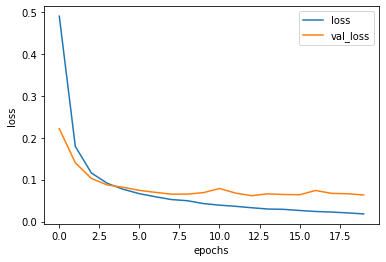

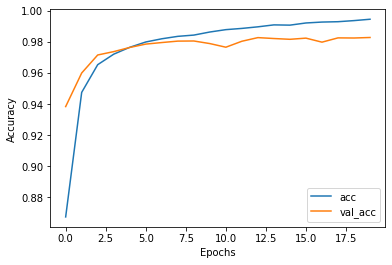

In [12]:
history = network_history.history
print(history.keys())

plot_history(network_history)




In [ ]:
# Evaluate
import numpy as np

test_loss, test_acc = myModel.evaluate(X_test, Y_test)
print(test_loss, test_acc)

test_labels_p = myModel.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

# Change layers config
# myModel.layers[0].name = 'Layer_0'
# myModel.layers[0].trainable = False
# myModel.layers[0].get_config()